## Data Understanding
unique_id= A unique identifier or key for each record in the dataset

date_time_of_pickup= The time when the ride started

longitude_of_pickup= Longitude of the taxi ride pickup point

latitude_of_pickup= Latitude of the taxi ride pickup point

longitude__of_dropoff= Longitude of the taxi ride dropoff point

latitude_of_dropoff= Latitude of the taxi ride dropoff

point no_of_passenger= count of the passengers during the ride

Amount= (target variable) dollar amount of the cost of the taxi ride

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("TaxiFare.csv")
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [3]:
df.shape

(50000, 8)

In [4]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [6]:
df['amount'].describe()

count    50000.000000
mean        11.364171
std          9.685557
min         -5.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        200.000000
Name: amount, dtype: float64

In [7]:
index_names = df[df["amount"]<2.5].index # we dropped it because the charge of taxi in new york can never be less than 2.5
index_names

Int64Index([2039, 2486, 2780, 10002, 13032, 27891, 28839, 36722, 42337, 47302], dtype='int64')

In [8]:
# Taxi fare amount can never be negative, also the charge of taxi can never be less than 2.5 in New York so dropping them.

In [9]:
df.drop(index_names,inplace=True)

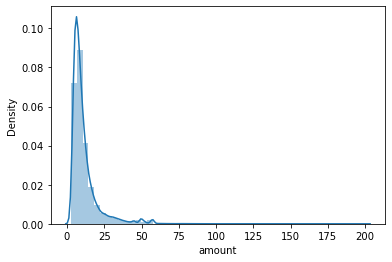

In [10]:
sns.distplot(df['amount'])
plt.show()

<AxesSubplot:ylabel='Density'>

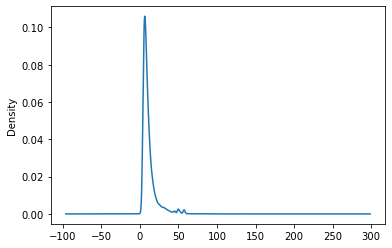

In [69]:
df['amount'].plot.density()

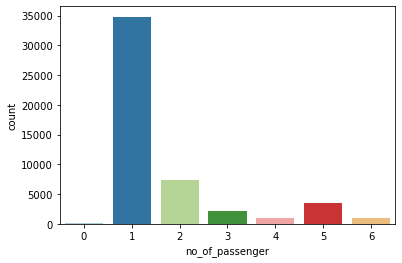

In [11]:
sns.countplot(x="no_of_passenger",data =df,palette="Paired")
plt.show()

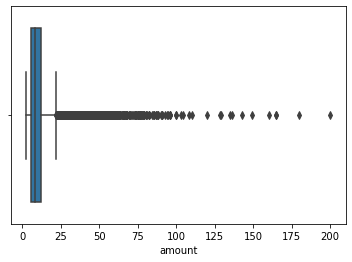

In [12]:
sns.boxplot(df['amount'])  #presence of outliers
plt.show()

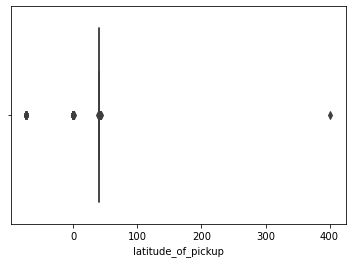

In [13]:
sns.boxplot(df['latitude_of_pickup'])
plt.show()

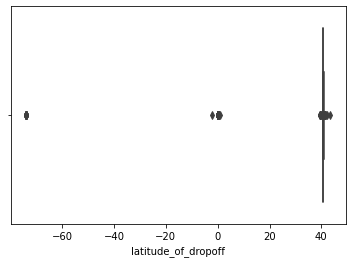

In [14]:
sns.boxplot(df['latitude_of_dropoff'])
plt.show()

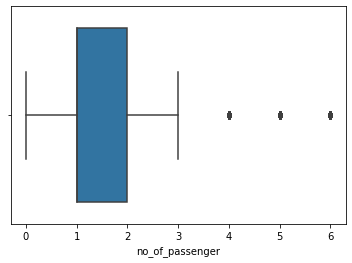

In [15]:
sns.boxplot(df['no_of_passenger'])
plt.show()

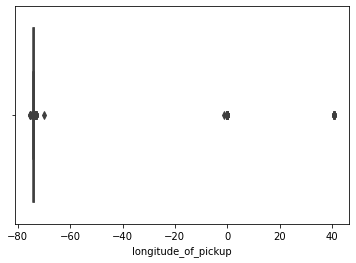

In [16]:
sns.boxplot(df['longitude_of_pickup'])
plt.show()

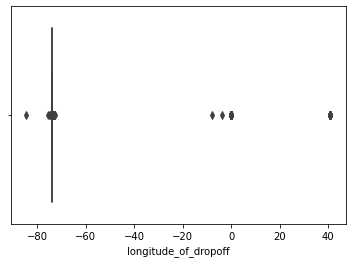

In [17]:
sns.boxplot(df['longitude_of_dropoff'])
plt.show()

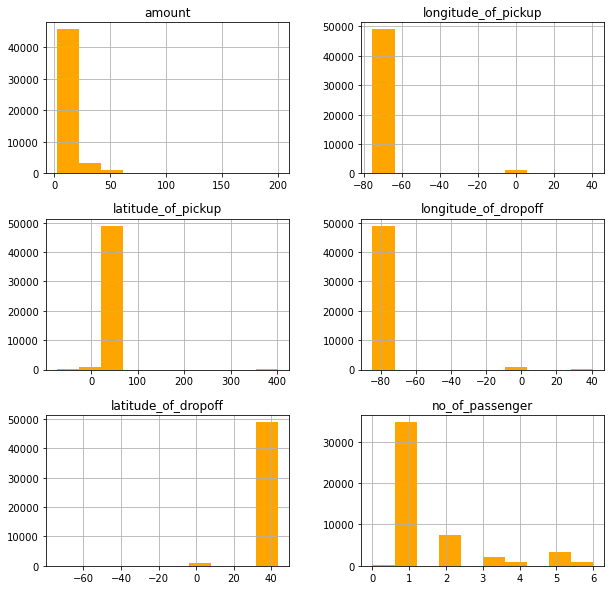

In [18]:
df.hist(figsize=(10,10),color='orange')
plt.show()

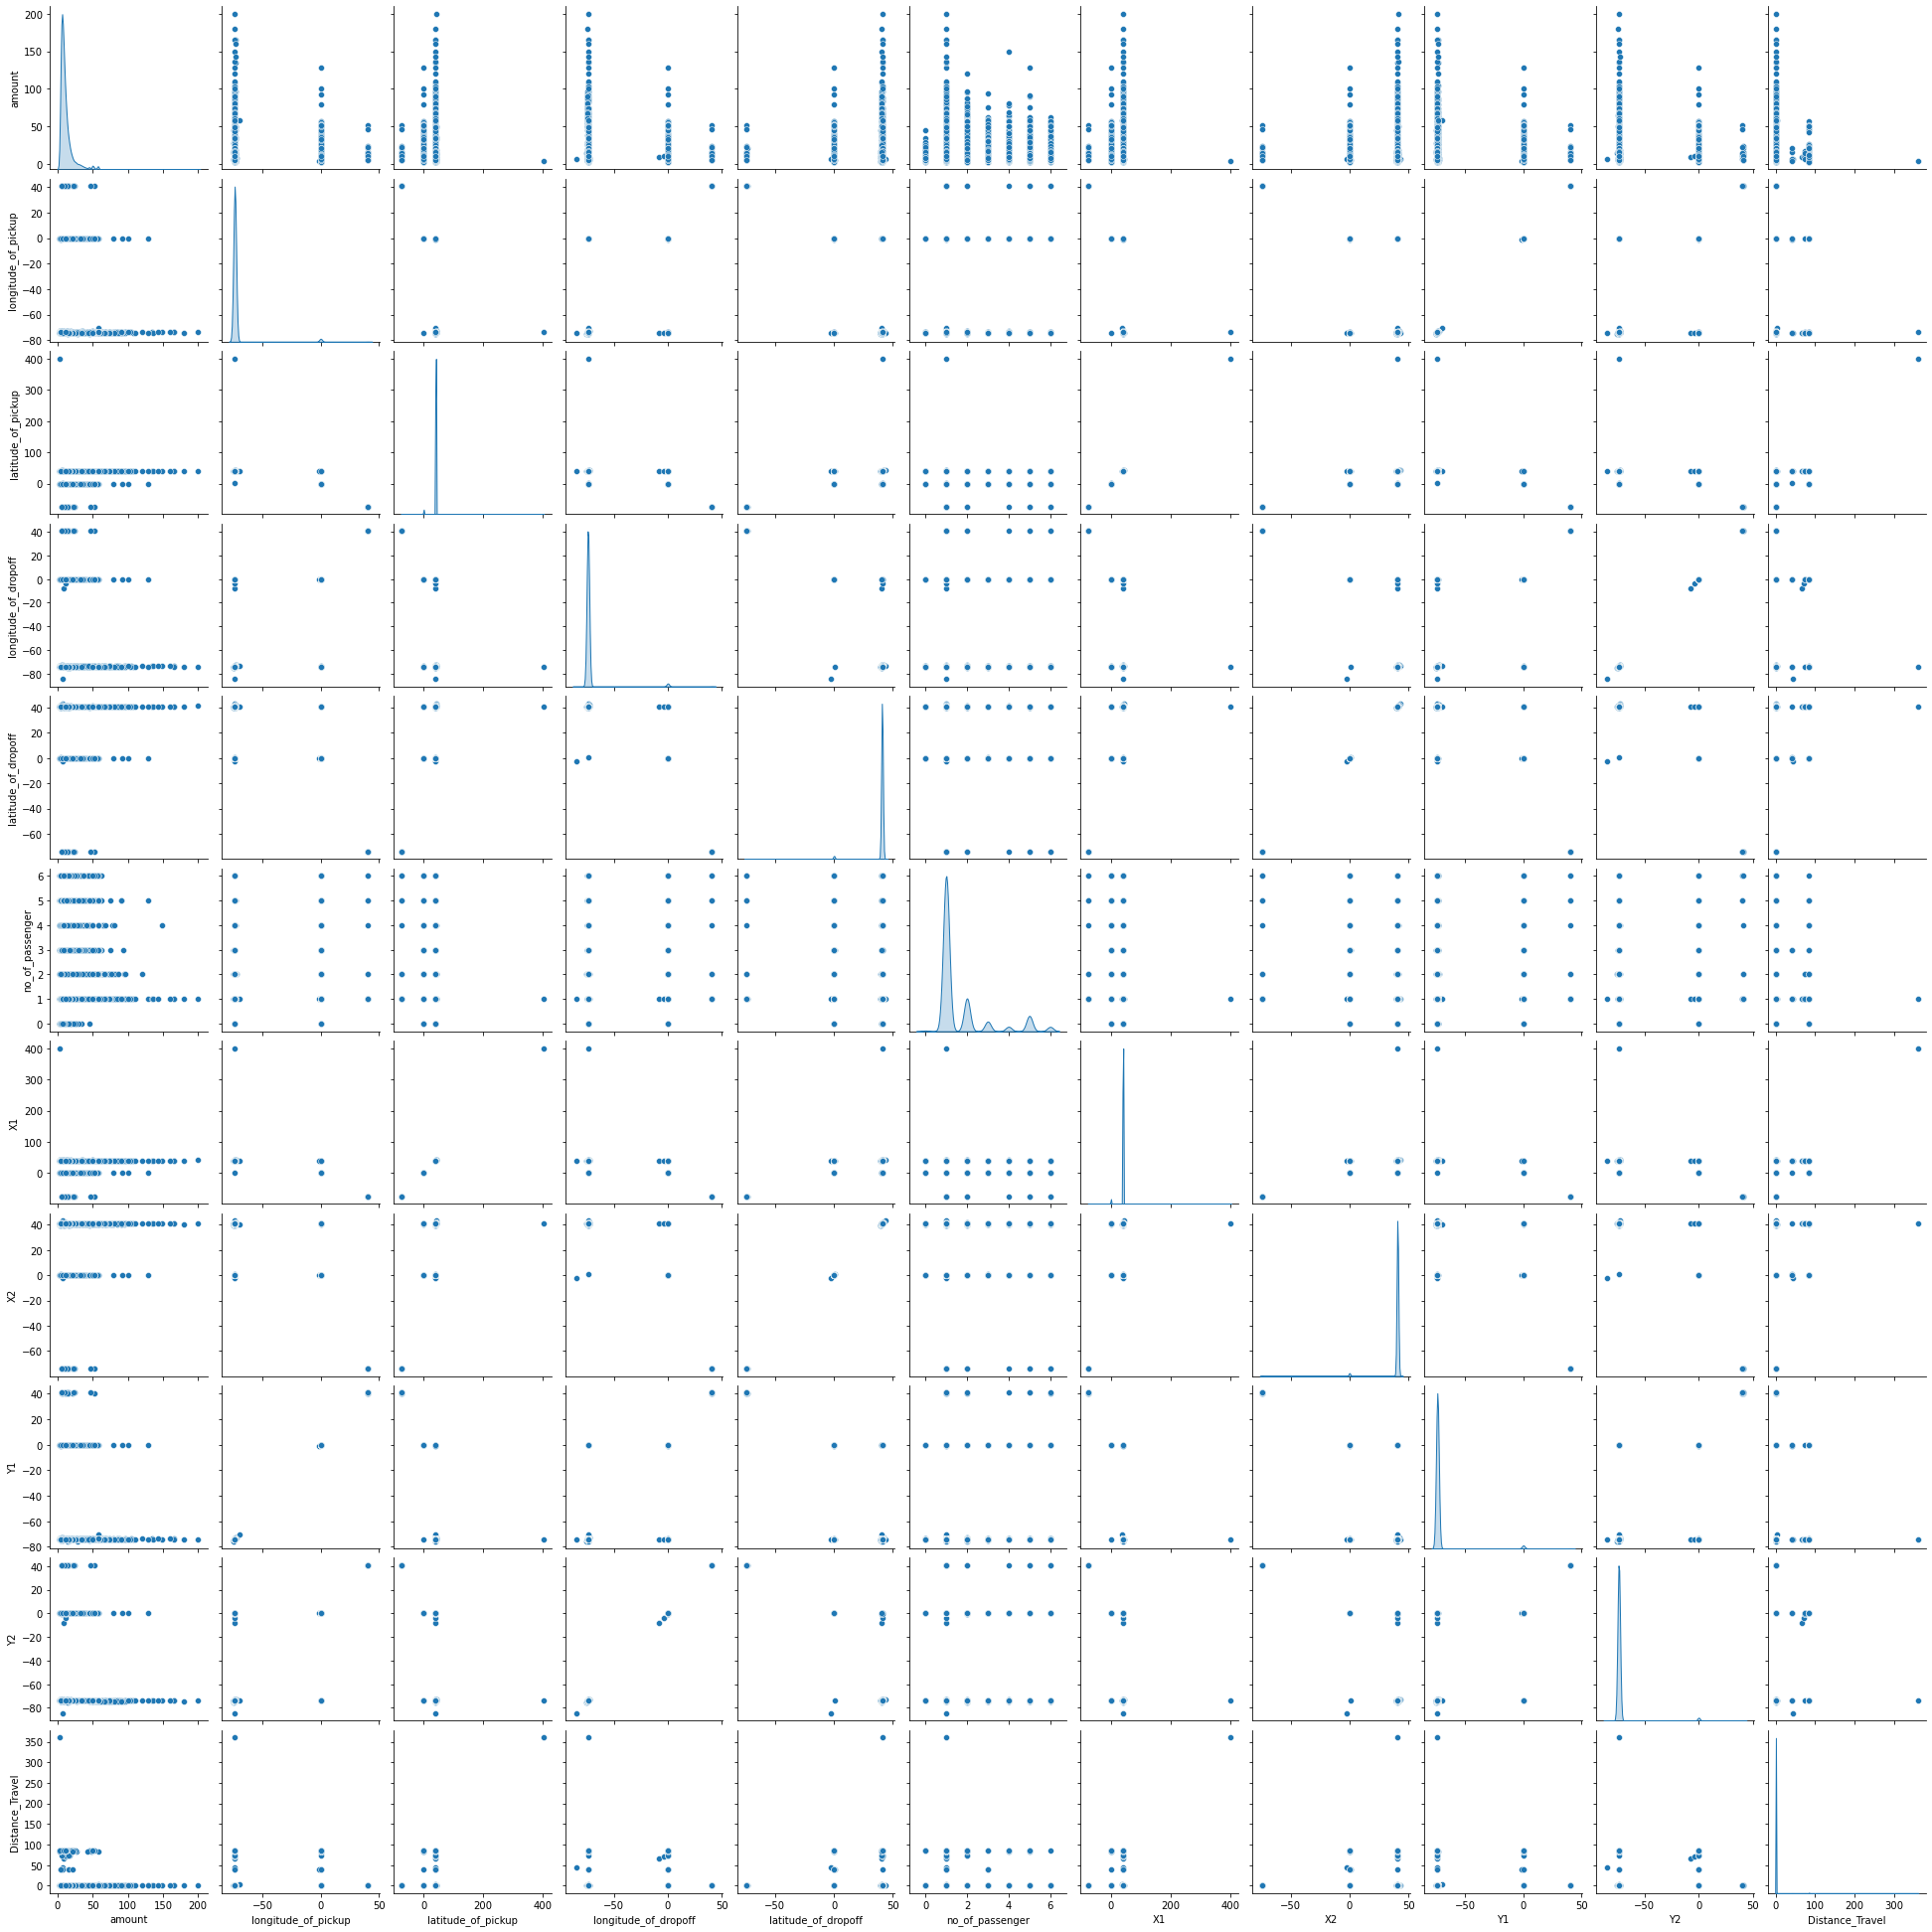

In [70]:
sns.pairplot(df,diag_kind='kde')

<AxesSubplot:xlabel='no_of_passenger', ylabel='amount'>

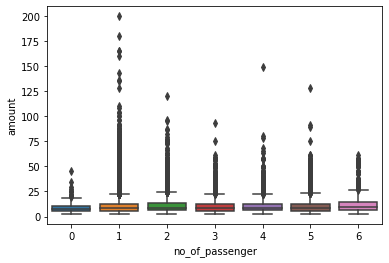

In [71]:
sns.boxplot(x='no_of_passenger',y='amount',data=df)

### Checking the Presence of Outliers in Dataset

In [19]:
df.describe(percentiles = [0.01,.02,.03,.04,.05,.1,.25,.4,.5,.75,.9,.95,.96,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,40%,50%,75%,90%,95%,96%,98%,99%,max
amount,49990.0,11.366813,9.684697,2.500000,3.300000,3.500000,3.700000,4.000000,4.100000,4.500000,6.000000,7.300000,8.500000,12.500000,20.500000,30.500000,33.566400,46.500000,52.000000,200.000000
longitude_of_pickup,49990.0,-72.509468,10.394880,-75.423848,-74.014436,-74.010456,-74.008734,-74.007742,-74.006816,-74.002780,-73.992062,-73.985837,-73.981840,-73.967155,-73.950996,-73.871348,-73.862870,-73.137393,0.000000,40.783472
latitude_of_pickup,49990.0,39.933598,6.225469,-74.006893,0.000000,40.578523,40.645443,40.681107,40.702132,40.717985,40.734883,40.746855,40.752679,40.767360,40.779778,40.787795,40.790614,40.799604,40.807129,401.083332
longitude_of_dropoff,49990.0,-72.505803,10.403539,-84.654241,-74.015120,-74.011755,-74.009840,-74.008284,-74.007275,-74.002710,-73.991152,-73.984217,-73.980082,-73.963588,-73.944750,-73.873280,-73.864201,-73.434436,0.000000,40.851027
latitude_of_dropoff,49990.0,39.926903,6.012677,-74.006377,0.000000,40.569767,40.646891,40.672764,40.686076,40.713277,40.734375,40.747609,40.753373,40.768166,40.782897,40.794074,40.798798,40.810249,40.832503,43.415190
no_of_passenger,49990.0,1.667914,1.289250,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,5.000000,5.000000,5.000000,6.000000,6.000000


In [20]:
df["X1"] = df["latitude_of_pickup"]
df["X2"] = df["latitude_of_dropoff"]
df["Y1"] = df["longitude_of_pickup"]
df["Y2"] = df["longitude_of_dropoff"]

In [21]:
df["Distance_Travel"] = np.sqrt((np.square(df["X1"]-df["X2"]))+(np.square(df["Y1"]-df["Y2"])))

We have used the Euclidean Distance formula to calculate the distance.

In [22]:
df1=df.drop(columns=["longitude_of_pickup","latitude_of_pickup","longitude_of_dropoff","latitude_of_dropoff"])


In [23]:
df1[["date","Time","Zone"]]=df1["date_time_of_pickup"].str.split(pat=" ",n=-1 , expand=True)
#splitting the date_time_of_pickup in separate columns.

In [24]:
df2 = df1.copy()

In [25]:
df2["amount"] = np.where(df2["amount"]>=52, 52, df2["amount"])
df2["no_of_passenger"] = np.where(df2["no_of_passenger"]>=5, 4, df2["no_of_passenger"])
df2["Distance_Travel"] = np.where(df2["Distance_Travel"]>=0.228218, 0.228218, df2["Distance_Travel"])
#Outlier Treatment

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49990 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   unique_id            49990 non-null  object 
 1   amount               49990 non-null  float64
 2   date_time_of_pickup  49990 non-null  object 
 3   no_of_passenger      49990 non-null  int64  
 4   X1                   49990 non-null  float64
 5   X2                   49990 non-null  float64
 6   Y1                   49990 non-null  float64
 7   Y2                   49990 non-null  float64
 8   Distance_Travel      49990 non-null  float64
 9   date                 49990 non-null  object 
 10  Time                 49990 non-null  object 
 11  Zone                 49990 non-null  object 
dtypes: float64(6), int64(1), object(5)
memory usage: 5.0+ MB


In [27]:
df2["date"]=pd.to_datetime(df2["date"])
df2["date_time_of_pickup"]=pd.to_datetime(df["date_time_of_pickup"])
#changing the type from object to dateitme.


In [28]:
df2["hours"]=df2["date_time_of_pickup"].dt.hour
df2["min"]=df2["date_time_of_pickup"].dt.minute
df2["second"]=df2["date_time_of_pickup"].dt.second
df2["year"]=df2["date_time_of_pickup"].dt.year
df2["day_of_the_month"]=df2["date_time_of_pickup"].dt.day
#Extracting some features from date_time_of_pickup

In [29]:
def time_of_day(x):
    if x in range(6,12):
        return "Morning"
    elif x in range(12,17):
        return "Afternoon"
    elif x in range(17,21):
        return "Evening"
    else:
        return "Night"

We have now divided the entire 24-hour period into four pieces.
Morning: 6 a.m. to 12 p.m.

Afternoon: 12 p.m. to 17 p.m.

Afternoon: 17 p.m. to 21 p.m.

Evening: 21 p.m. to 6 a.m.

In comparison to the other times, the fare is significantly higher in the afternoon and at night. This increase could be related to the unusual hours, as most cab firms impose a night premium so that drivers don't cancel rides and lose out on the odd hour incentives.

In [30]:
df2["time_of_day"]=df2["hours"].apply(time_of_day)

In [31]:
df2["day"]=df2["date_time_of_pickup"].dt.day_name()
df2["day_no"]=df2["date_time_of_pickup"].dt.weekday

In [32]:
# Remove latitude and longitude outliers
df2=df2.loc[df2['X1'].between(40,42)]
df2=df2.loc[df2['Y1'].between(-75,-72)]
df2=df2.loc[df2['X2'].between(40,42)]
df2=df2.loc[df2['Y1'].between(-75,-72)]
print(f'New number of observations:{df2.shape[0]}')

New number of observations:48951


In [33]:
df2.head()

,unique_id,amount,date_time_of_pickup,no_of_passenger,X1,X2,Y1,Y2,Distance_Travel,date,Time,Zone,hours,min,second,year,day_of_the_month,time_of_day,day,day_no
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,1,40.721319,40.712278,-73.844311,-73.841610,0.009436,2009-06-15,17:26:21,UTC,17,26,21,2009,15,Evening,Monday,0
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,1,40.711303,40.782004,-74.016048,-73.979268,0.079696,2010-01-05,16:52:16,UTC,16,52,16,2010,5,Afternoon,Tuesday,1
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,2,40.761270,40.750562,-73.982738,-73.991242,0.013674,2011-08-18,00:35:00,UTC,0,35,0,2011,18,Night,Thursday,3
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,1,40.733143,40.758092,-73.987130,-73.991567,0.025340,2012-04-21,04:30:42,UTC,4,30,42,2012,21,Night,Saturday,5
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,1,40.768008,40.783762,-73.968095,-73.956655,0.019470,2010-03-09,07:51:00,UTC,7,51,0,2010,9,Morning,Tuesday,1


# Data Visualization

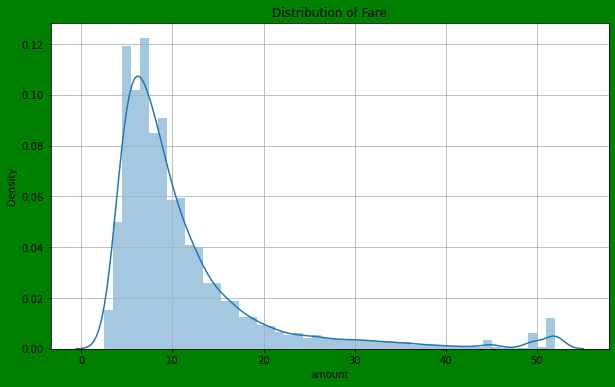

In [34]:
plt.figure(figsize = (10, 6),facecolor="green")
sns.distplot(df2['amount']);
plt.title('Distribution of Fare')
plt.grid()


We checked the distribution of the amount/fare and as it can be seen the distribution is highly skewed. In addition, the density of fare in the range of 0 to 20 is significantly higher. This could indicate that individuals prefer not to use taxi services for lengthy distances because long distances imply a high fare.

Text(0, 0.5, 'Fare $USD / mile')

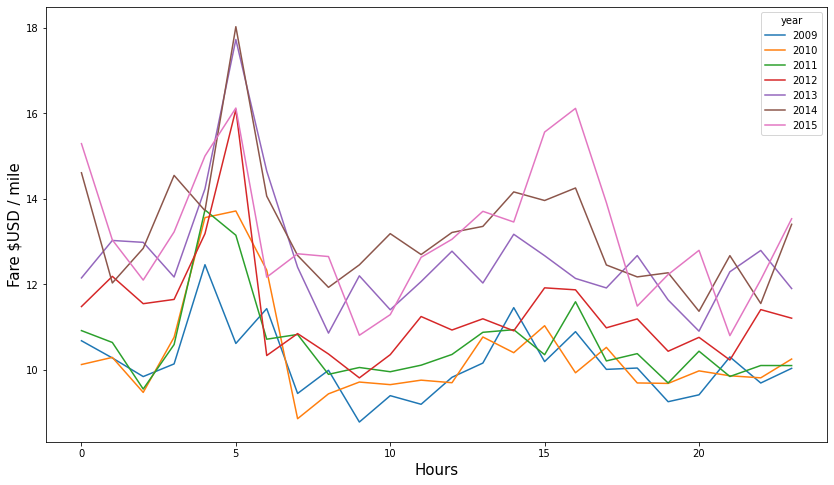

In [35]:
df2.pivot_table(index='hours', columns='year', values="amount",aggfunc="mean").plot(figsize=(14,8))
plt.xlabel("Hours",fontsize=(15))
plt.ylabel('Fare $USD / mile',fontsize=(15))

For different years, this graph displays the link between fare/mile and hour. Each crooked line represents a distinct year's fare movement. Every line has some ascend between 5 and 7 a.m., which is often the commencement of business hours, and therefore a spike in fare can be expected.

Text(0, 0.5, 'Average Fare')

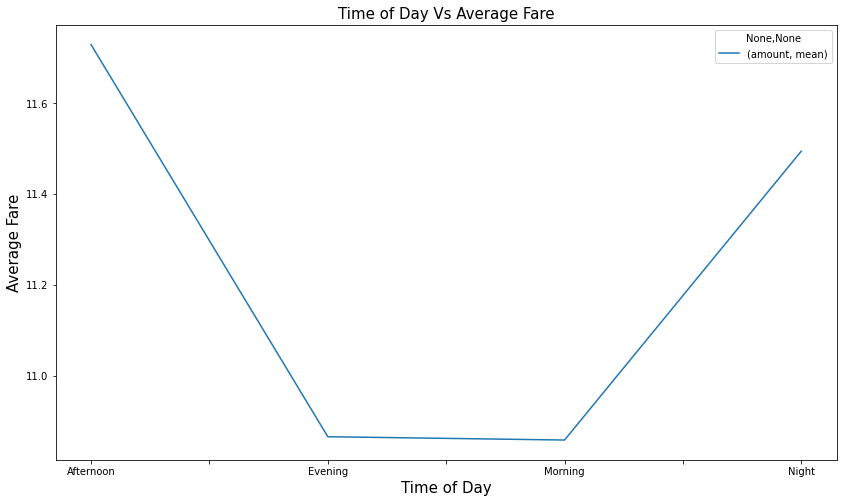

In [36]:
df2.groupby(df2["time_of_day"]).agg({"amount":["mean"]}).plot(figsize=(14,8))
plt.title("Time of Day Vs Average Fare",fontsize=(15))
plt.xlabel("Time of Day",fontsize=(15))
plt.ylabel('Average Fare',fontsize=(15))

Text(0, 0.5, 'Average Fare')

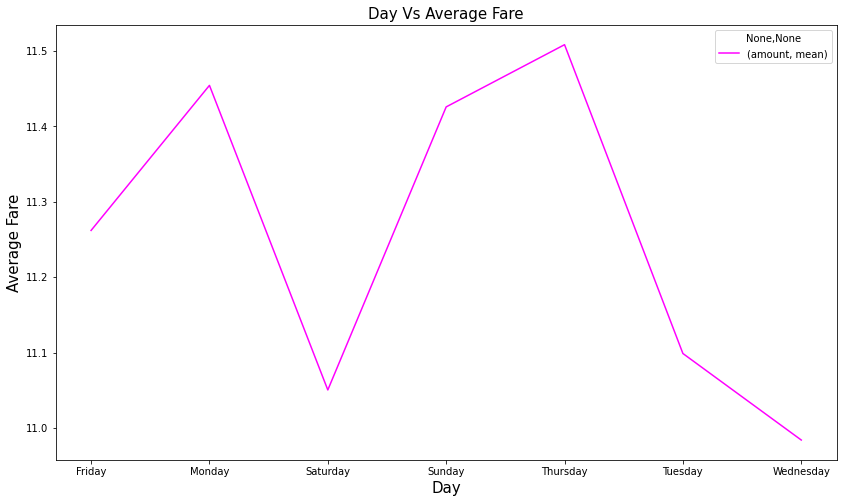

In [37]:
df2.groupby(df2["day"]).agg({"amount":["mean"]}).plot(figsize=(14,8),color="magenta")
plt.title("Day Vs Average Fare",fontsize=(15))
plt.xlabel("Day",fontsize=(15))
plt.ylabel('Average Fare',fontsize=(15))


We see an unusual pattern here, as the average fare on weekends should be lower than on other days. A portion of this can be seen in the Saturday drop in average fare. However, Sunday is the day when most people plan intercity journeys to shops and restaurants, so the small increase on Sunday could be related to that.

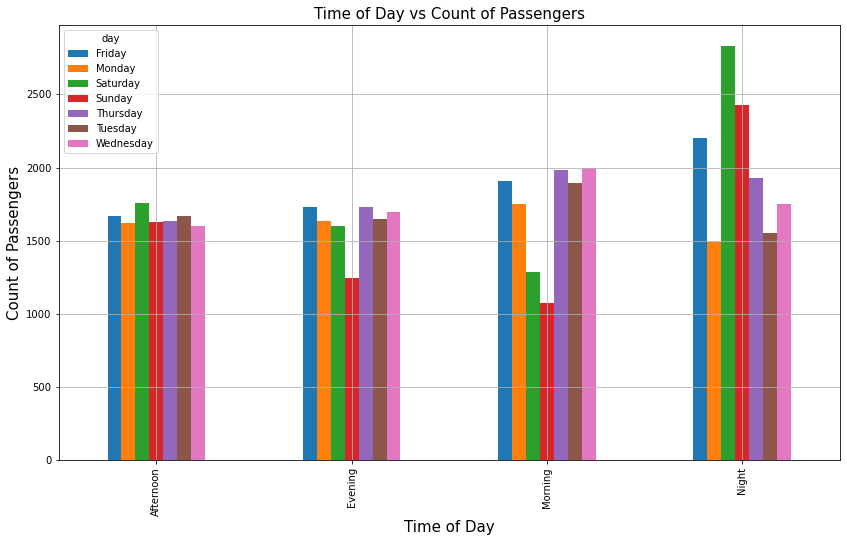

In [38]:
df2.pivot_table(index='time_of_day', columns='day', values="no_of_passenger",aggfunc="count").plot(figsize=(14,8),kind='bar')
plt.title("Time of Day vs Count of Passengers",fontsize=(15))
plt.xlabel("Time of Day",fontsize=(15))
plt.ylabel('Count of Passengers',fontsize=(15));
plt.grid()

The suitable trend may be seen when looking at the time of day vs. the number of passengers on different days. The majority of passengers travelling at night do so on weekends, particularly on Saturday and Sunday, while for other times of day, particularly in the morning, less people use taxi services on Saturday and Sunday.

Text(0, 0.5, 'Average Fare')

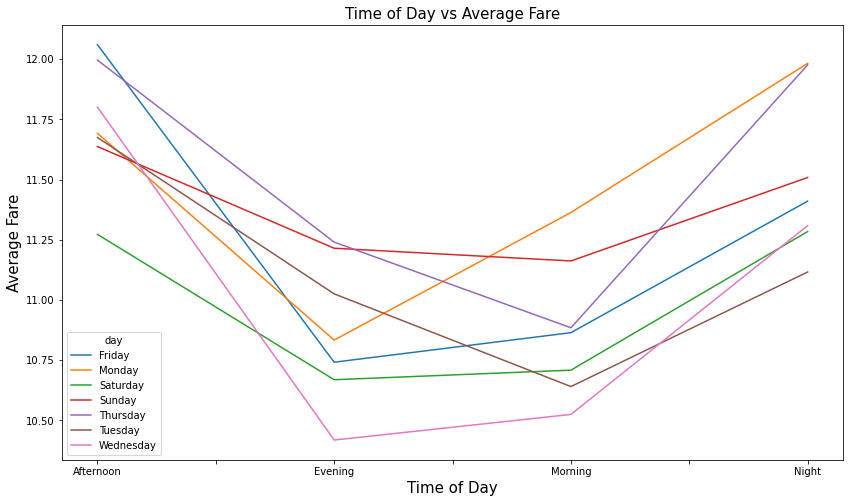

In [39]:
df2.pivot_table(index='time_of_day', columns='day', values="amount",aggfunc="mean").plot(figsize=(14,8))
plt.title("Time of Day vs Average Fare",fontsize=(15))
plt.xlabel("Time of Day",fontsize=(15))
plt.ylabel('Average Fare',fontsize=(15))

It's merely a different version of the graph above. With respect to different days, time of day vs. average fare. Wednesday has the lowest average fare for evening and morning travel, while Friday and Monday have the highest average fare for afternoon and night travel.

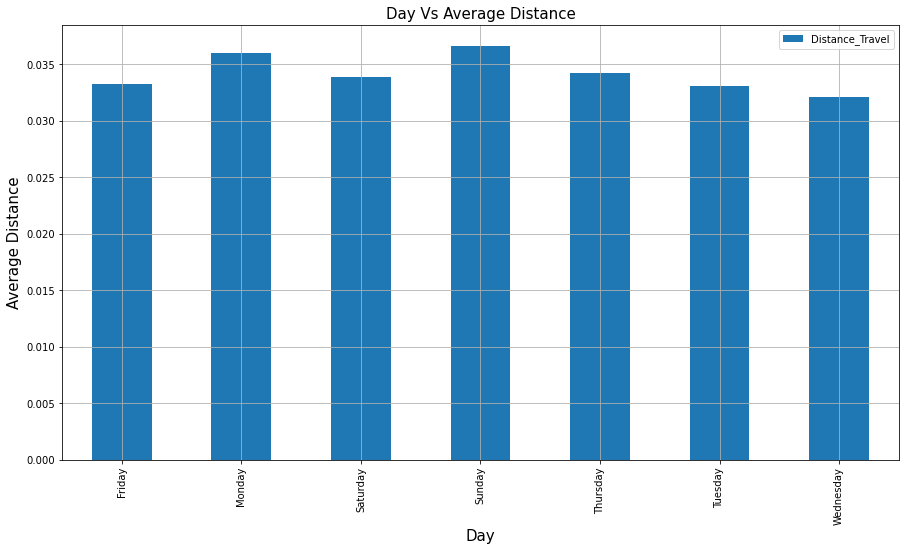

In [40]:
df2.pivot_table(index="day",values= "Distance_Travel",aggfunc="mean").plot(figsize=(15,8),kind='bar')
plt.title("Day Vs Average Distance",fontsize=(15))
plt.xlabel("Day",fontsize=(15))
plt.ylabel('Average Distance',fontsize=(15));
plt.grid()

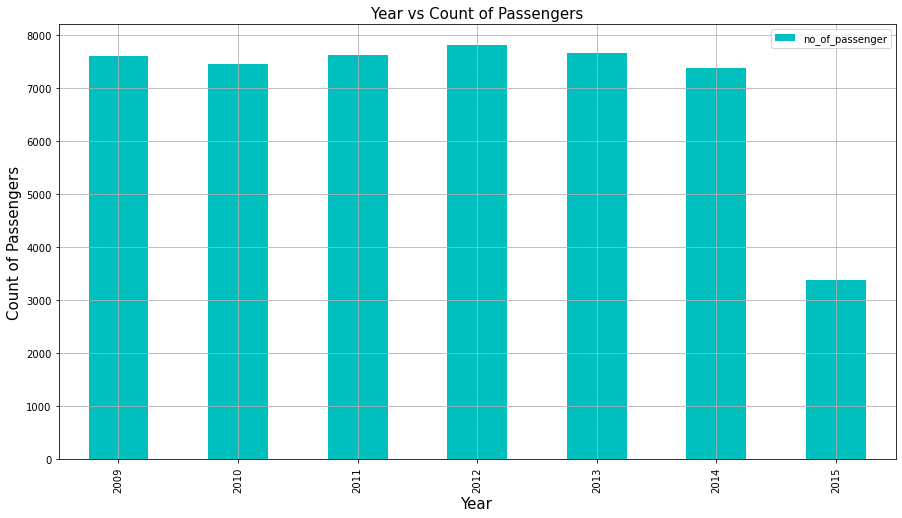

In [41]:
df2.pivot_table(index="year",values= "no_of_passenger",aggfunc="count").plot(figsize=(15,8), kind='bar',color='c')
plt.title("Year vs Count of Passengers",fontsize=(15))
plt.xlabel("Year",fontsize=(15))
plt.ylabel('Count of Passengers',fontsize=(15));
plt.grid()

Text(0, 0.5, 'No_of_Passengers')

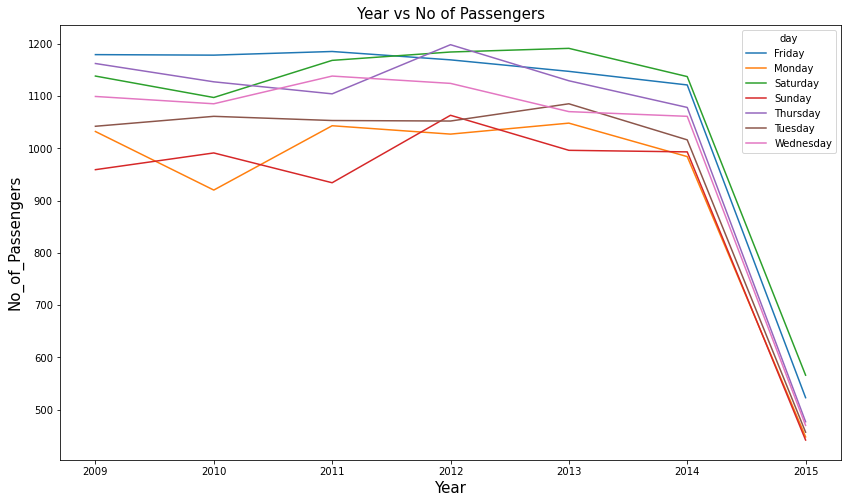

In [42]:
df2.pivot_table(index="year",columns="day",values="no_of_passenger",aggfunc="count").plot(figsize=(14,8))
plt.title("Year vs No of Passengers",fontsize=(15))
plt.xlabel("Year",fontsize=(15))
plt.ylabel('No_of_Passengers',fontsize=(15))


The number of passengers is falling at the end of 2014, as seen in the graph above, and the trend of each day for the given years is similar.

In [43]:
df2.select_dtypes(include='O').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48951 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   unique_id    48951 non-null  object
 1   Time         48951 non-null  object
 2   Zone         48951 non-null  object
 3   time_of_day  48951 non-null  object
 4   day          48951 non-null  object
dtypes: object(5)
memory usage: 2.2+ MB


In [44]:
df2.drop(columns=["unique_id","Time","Zone","date","min","second","date_time_of_pickup","X1","X2","Y1","Y2"],inplace =True)


In [45]:
# 1: Yes
# 0: No
# Is_Weekend - if day_no between (0,6) : 1
#              else i.e (1 to 5): 0
# Is_starting_of_month - day of month between (1-10)
# Is_middle_of_month - day of month between (15-20)
# Is_end_of_month - day of month between (20-31)

In [46]:
df3 = pd.get_dummies(df2,columns=["time_of_day","day"]) #Dummy Creation


In [47]:
df3["Is_Weekend"] =np.where(df3["day_no"].isin ([0,6]),1,0)
df3["Is_starting_of_month"] = np.where(df3["day_of_the_month"].isin ([1,2,3,4,5,6,7,8,9,10]),1,0)
df3["Is_middle_of_month"] = np.where(df3["day_of_the_month"].isin (range(11,21)),1,0)
df3["Is_end_of_month"] = np.where(df3["day_of_the_month"].isin (range(21,32)),1,0)
df3["Is_leap_year"] = np.where((df3["year"]%4 == 0),1,0)

In [48]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48951 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount                 48951 non-null  float64
 1   no_of_passenger        48951 non-null  int64  
 2   Distance_Travel        48951 non-null  float64
 3   hours                  48951 non-null  int64  
 4   year                   48951 non-null  int64  
 5   day_of_the_month       48951 non-null  int64  
 6   day_no                 48951 non-null  int64  
 7   time_of_day_Afternoon  48951 non-null  uint8  
 8   time_of_day_Evening    48951 non-null  uint8  
 9   time_of_day_Morning    48951 non-null  uint8  
 10  time_of_day_Night      48951 non-null  uint8  
 11  day_Friday             48951 non-null  uint8  
 12  day_Monday             48951 non-null  uint8  
 13  day_Saturday           48951 non-null  uint8  
 14  day_Sunday             48951 non-null  uint8  
 15  da

# Building the Model

In [49]:
X = df3.drop(columns=["amount"])
y = df3["amount"]

In [50]:
corr_data=X.corr()

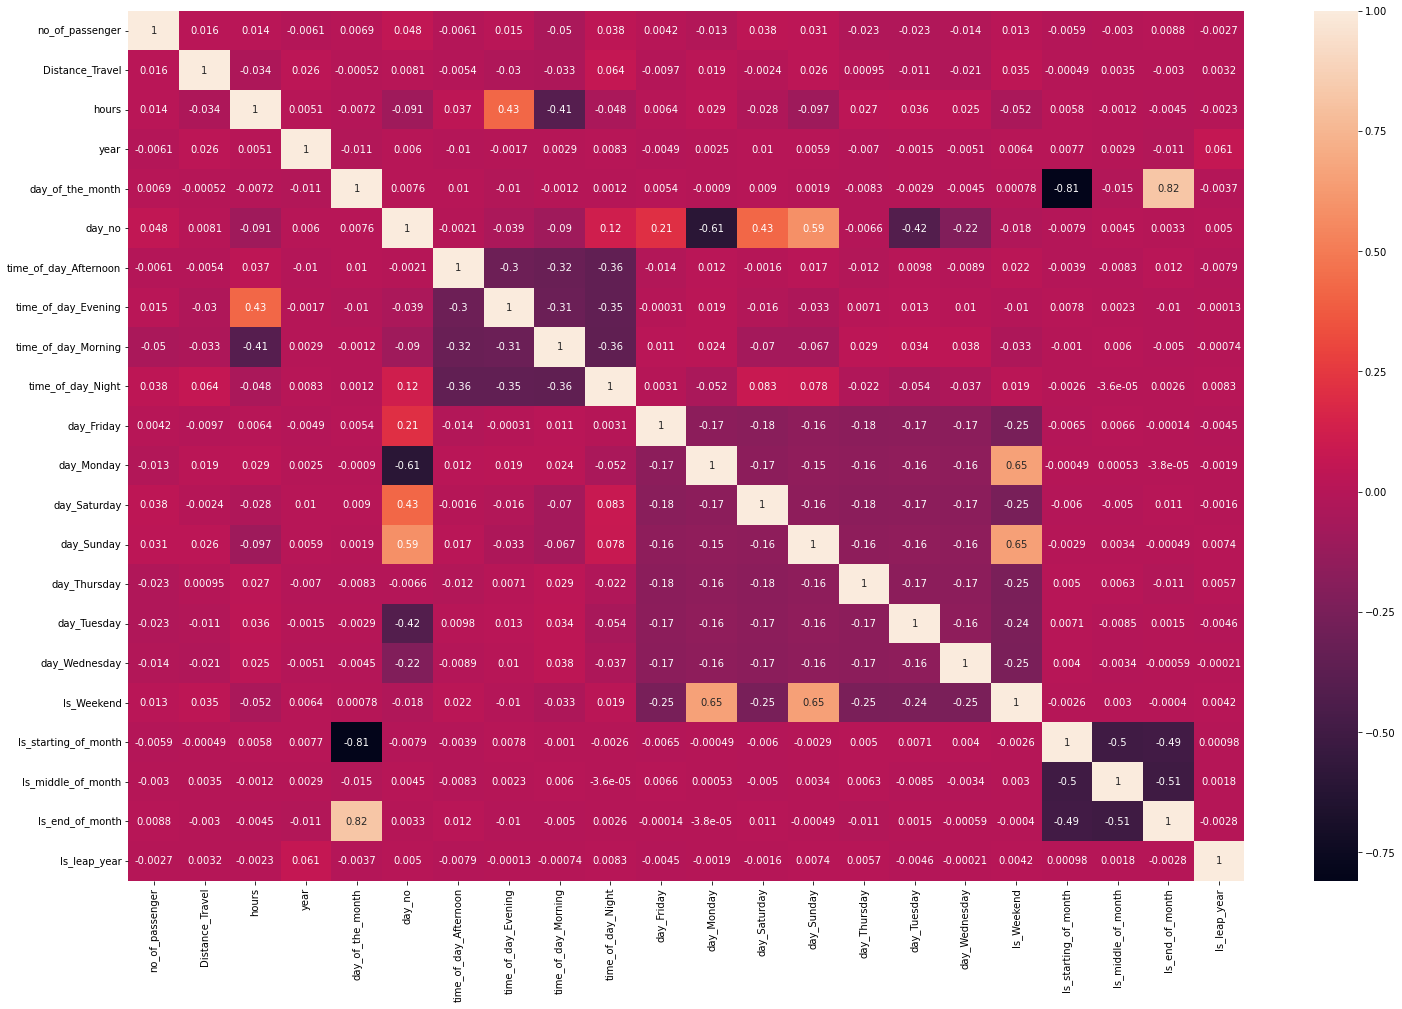

In [51]:
#Using Pearson Correlation
plt.figure(figsize=(25,16))
sns.heatmap(corr_data, annot=True)
plt.show()

In [52]:
X_train,X_test,y_train,y_test =train_test_split(X,y, test_size = 0.2 , random_state = 1)

In [53]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39160 entries, 32928 to 33710
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   no_of_passenger        39160 non-null  int64  
 1   Distance_Travel        39160 non-null  float64
 2   hours                  39160 non-null  int64  
 3   year                   39160 non-null  int64  
 4   day_of_the_month       39160 non-null  int64  
 5   day_no                 39160 non-null  int64  
 6   time_of_day_Afternoon  39160 non-null  uint8  
 7   time_of_day_Evening    39160 non-null  uint8  
 8   time_of_day_Morning    39160 non-null  uint8  
 9   time_of_day_Night      39160 non-null  uint8  
 10  day_Friday             39160 non-null  uint8  
 11  day_Monday             39160 non-null  uint8  
 12  day_Saturday           39160 non-null  uint8  
 13  day_Sunday             39160 non-null  uint8  
 14  day_Thursday           39160 non-null  uint8  
 15

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler

## RandomForest Regressor

In [55]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
print("Train R", rf.score(X_train,y_train))
print("Test R",rf.score(X_test,y_test))

Train R 0.9733596986449821
Test R 0.8066319635470608


In [56]:
param = {"n_estimators":[20,50],"criterion":['squared_error'] ,"max_depth": [3,5],"min_samples_split":[2,4],
                "min_samples_leaf":[2,4]}

rf2 = RandomForestRegressor()
Grid_search = GridSearchCV(estimator = rf2, param_grid=param,cv=5,verbose=1,n_jobs=-1)
Grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error'], 'max_depth': [3, 5],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 4],
                         'n_estimators': [20, 50]},
             verbose=1)

In [57]:
print("Train R", Grid_search.score(X_train,y_train))
print("Test R",Grid_search.score(X_test,y_test))

Train R 0.823452465777301
Test R 0.8153090529766931


## Linear Regression

In [58]:
lr= LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [59]:
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.7907021443927631
0.7910996963719692


In [60]:
# Import necessary libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor


## Decision Tree Regression

The random_state parameter in decision tree algorithms (and in many other machine learning algorithms) is used to set a seed for the random number generator.

max_depth parameter is used to control the depth of the tree. The depth of a decision tree refers to the number of levels or nodes from the root node to the leaf nodes.

In [61]:
dt=DecisionTreeRegressor(random_state=0,max_depth=5)   #Preventing Overfitting
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [62]:
print(dt.score(X_train,y_train))
print(dt.score(X_test,y_test))

0.8176810428564707
0.8107025030798023


## Bagging Regression 

n_estimators is the number of base models (also known as weak learners or base estimators) to be used in the ensemble.

base_estimator is the type of machine learning model or algorithm that serves as the base or weak learner in the ensemble. It is typically a simple model, such as a decision tree with limited depth.

In [63]:
bg=BaggingRegressor(n_estimators=8,base_estimator=dt) #Preventing Overfitting
bg.fit(X_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=5,
                                                      random_state=0),
                 n_estimators=8)

In [64]:
print(bg.score(X_train,y_train))
print(bg.score(X_test,y_test))

0.8231804101475821
0.8151110458424132


## Adaboost Regressor

In [65]:
abr=AdaBoostRegressor(n_estimators=7)
abr.fit(X_train,y_train)

AdaBoostRegressor(n_estimators=7)

In [66]:
print(abr.score(X_train,y_train))
print(abr.score(X_test,y_test))

0.7046287459384116
0.6857122289875538


## Gradient Boosting Regressor

In [67]:
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [68]:
print(gbr.score(X_train,y_train))
print(gbr.score(X_test,y_test))

0.8397765580554364
0.8261770075126109


## THANK YOU 